# Numpy

## Intro

本课将介绍通过 Python 有效导入、存储和操作内存数据的主要技巧。这个主题非常广泛, 因为数据集的来源与格式都十分丰富, 比如文档集合、图像集合、声音片段集合、数值数据集合, 等等。这些数据虽然存在明显的异构性, 但是将所有数据简单地看作数字数组非常有助于我们理解和处理数据。
例如, 可以将图像（尤其是数字图像）简单地看作二维数字数组, 这些数字数组代表各区 域的像素值; 声音片段可以看作时间和强度的一维数组; 文本也可以通过各种方式转换成 数值表示, 一种可能的转换是用二进制数表示特定单词或单词对出现的频率。不管数据是何种形式, 第一步都是将这些数据转换成数值数组形式的可分析数据。
正因如此, 有效地存储和操作数值数组是数据科学中绝对的基础过程。我们将详细介绍 NumPy。NumPy（Numerical Python 的简称）提供了高效存储和操作密集数据缓存的接口。在某些方面, NumPy 数组与 Python 内置的列表类型非常相似。但是随着数组在维度上变大, NumPy 数组提供了更加高效的存储和数据操作。NumPy 数组几乎是整个 Python 数据科学工具生态系统的核心。因此, 不管你对数据科学的哪个方面感兴趣, 花点时间学习如何有效地使用 NumPy 都是非常值得的。
如果你听从前言给出的建议安装了 Anaconda, 那么你已经安装好 NumPy, 并可以使用它 了。如果你是个体验派, 则可以到 NumPy 网站（http://www.numpy.org/）按照其安装指导进行安装。安装好后, 你可以导入 NumPy 并再次核实你的 NumPy 版本:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.__version__

'1.22.4'

## Python 数据类型

要实现高效的数据驱动科学和计算，需要理解数据是如何被存储和操作的。本节将介绍在
Python 语言中数据数组是如何被处理的，并对比 NumPy 所做的改进。理解这个不同之处
是理解本书其他内容的基础。
Python 的用户往往被其易用性所吸引，其中一个易用之处就在于动态输入。静态类型的语
言（如 C 或 Java）往往需要每一个变量都明确地声明，而动态类型的语言（例如 Python）
可以跳过这个特殊规定。例如在 C 语言中，你可能会按照如下方式指定一个特殊的操作：

``` c
/* C代码 */
int result = 0;
for(int i=0; i<100; i++){
 result += i;
}
```
而在 Python 中，同等的操作可以按照如下方式实现：

``` Python
# Python代码
result = 0
for i in range(100):
 result += i
```
注意这里最大的不同之处：在 C 语言中，每个变量的数据类型被明确地声明；而在  Python 中，类型是动态推断的。这意味着可以将任何类型的数据指定给任何变量：
``` Python
# Python代码
x = 4
x = "four"
```

这里已经将 x 变量的内容由整型转变成了字符串，而同样的操作在 C 语言中将会导致（取
决于编译器设置）编译错误或其他未知的后果：

``` C
/* C代码 */
int x = 4;
x = "four"; // 编译失败
```

这种灵活性是使 Python 和其他动态类型的语言更易用的原因之一。理解这一特性如何工作
是学习用 Python 有效且高效地分析数据的重要因素。但是这种类型灵活性也指出了一个事
实：Python 变量不仅是它们的值，还包括了关于值的类型的一些额外信息，本节接下来的
内容将进行更详细的介绍。

### Python 整型不仅仅是一个整型
标准的 Python 实现是用 C 语言编写的。这意味着每一个 Python 对象都是一个聪明的伪 C 语言结构体，该结构体不仅包含其值，还有其他信息。例如，当我们在 Python 中定义一个整型，例如 x = 10000 时，x 并不是一个“原生”整型，而是一个指针，指向一个 C 语言的复合结构体，结构体里包含了一些值。查看 Python 3.4 的源代码，可以发现整型（长整型）的定义，如下所示（C 语言的宏经过扩展之后）：
```C
struct _longobject {
 long ob_refcnt;
 PyTypeObject *ob_type;
 size_t ob_size;
 long ob_digit[1];
};
```
Python 3.4 中的一个整型实际上包括 4 个部分。

- ob_refcnt 是一个引用计数，它帮助 Python 默默地处理内存的分配和回收。
- ob_type 将变量的类型编码。
- ob_size 指定接下来的数据成员的大小。
- ob_digit 包含我们希望 Python 变量表示的实际整型值。

这意味着与 C 语言这样的编译语言中的整型相比，在 Python 中存储一个整型会有一些开
销。

<div align=center>
<img width="500" src="https://zhaochenyang20.github.io/pic/embed/6_29_1.jpg"/>
</div>
<div align=center>C 整型和 Python 整型的区别，这里 PyObject_HEAD 是结构体中包含引用计数、类型编码和其他部分。</div>

两者的差异在于，C 语言整型本质上是对应某个内存位置的标签，里面存储的字节会编码成整型。而 Python 的整型其实是一个指针，指向包含这个 Python 对象所有信息的某个内存位置，其中包括可以转换成整型的字节。由于 Python 的整型结构体里面还包含了大量额外的信息，所以 Python 可以自由、动态地编码。但是，Python 类型中的这些额外信息也会成为负担，在多个对象组合的结构体中尤其明显。

### Python列表不仅仅是一个列表
设想如果使用一个包含很多 Python 对象的 Python 数据结构，会发生什么？ Python 中的标准可变多元素容器是列表。可以用如下方式创建一个整型值列表：

``` Python
In [1]: L = list(range(10))

In [2]: L
Out[2]: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
```

或者创建一个字符串列表：

``` Python
In [4]: L2 = [str(each) for each in L]

In [5]: L2
Out[5]: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [6]: type(L2[0])
Out[6]: str
```

因为 Python 的动态类型特性，甚至可以创建一个异构的列表：

``` Python
In [7]:  L3 = [True, "2", 3.0, 4]

In [8]: [type(item) for item in L3]
Out[8]: [bool, str, float, int]
```

但是想拥有这种灵活性也是要付出一定代价的：为了获得这些灵活的类型，列表中的每一项必须包含各自的类型信息、引用计数和其他信息；也就是说，每一项都是一个完整的 Python 对象。来看一个特殊的例子，如果列表中的所有变量都是同一类型的，那么很多信息都会显得多余——将数据存储在固定类型的数组中应该会更高效。动态类型的列表和固定类型的（NumPy 式）数组间的区别如下图所示。

<div align=center>
<img width="500" src="https://zhaochenyang20.github.io/pic/embed/6_29_2.jpg"/>
</div>
<div align=center>numpy 列表和 Python 列表的区别。</div>

在实现层面，数组基本上包含一个指向连续数据块的指针。另一方面，Python 列表包含一个指向指针块的指针，这其中的每一个指针对应一个完整的 Python 对象（如前面看到的 Python 整型）。另外，列表的优势是灵活，因为每个列表元素是一个包含数据和类型信息的完整结构体，而且列表可以用任意类型的数据填充。固定类型的 NumPy 式数组缺乏这种灵活性，但是能更有效地存储和操作数据。

# 创建和生成

本节主要介绍 array 的创建和生成。为什么会把这个放在最前面呢？主要有以下两个方面原因：

- 在实际工作过程中，我们时不时需要验证或查看 array 相关的 API 或互操作。
- 有时候在使用 sklearn，matplotlib，PyTorch，Tensorflow 等工具时也需要一些简单的数据进行实验。

所以，先学会如何快速拿到一个 array 是有很多益处的。本节我们主要介绍以下几种常用的创建方式：

- 使用列表或元组
- 使用 arange
- 使用 linspace/logspace
- 使用 ones/zeros
- 使用 random
- 从文件读取

其中，最常用的一般是 linspace/logspace 和 random，前者常常用在画坐标轴上，后者则用于生成「模拟数据」。举例来说，当我们需要画一个函数的图像时，X 往往使用 linspace 生成，然后使用函数公式求得 Y，再 plot；当我们需要构造一些输入（比如 X）或中间输入（比如 Embedding、hidden state）时，random 会异常方便。

### 从 python 列表或元组创建

⭐⭐

重点掌握传入 list 创建一个 array 即可：`np.array(list)`

⚠️ 需要注意的是：「数据类型」。如果您足够仔细的话，可以发现下面第二组代码第 2 个数字是「小数」（注：Python 中 1. == 1.0），而 array 是要保证每个元素类型相同的，所以会帮您把 array 转为一个 float 的类型。

In [5]:
# 一个 list
np.array([1,2,3])

array([1, 2, 3])

In [6]:
# 二维（多维类似）
# 注意，有一个小数
np.array([[1, 2., 3], [4, 5, 6]])

array([[1., 2., 3.],
       [4., 5., 6.]])

In [7]:
# 你也可以指定数据类型
np.array([1, 2, 3], dtype=np.float16)

array([1., 2., 3.], dtype=float16)

In [8]:
# 如果指定了 dtype，输入的值都会被转为对应的类型，而且不会四舍五入
lst = [
    [1, 2, 3],
    [4, 5, 6.8]
]
np.array(lst, dtype=np.int32)

array([[1, 2, 3],
       [4, 5, 6]], dtype=int32)

In [9]:
# 一个 tuple
np.array((1.1, 2.2))

array([1.1, 2.2])

In [10]:
# tuple，一般用 list 就好，不需要使用 tuple
np.array([(1.1, 2.2, 3.3), (4.4, 5.5, 6.6)])

array([[1.1, 2.2, 3.3],
       [4.4, 5.5, 6.6]])

In [11]:
# 转换而不是上面的创建，其实是类似的，无须过于纠结
np.asarray((1,2,3))

array([1, 2, 3])

In [12]:
np.asarray(([1., 2., 3.], (4., 5., 6.)))

array([[1., 2., 3.],
       [4., 5., 6.]])

## 使用 arange 生成

⭐⭐

range 是 Python 内置的整数序列生成器，arange 是 numpy 的，效果类似，会生成一维的向量。我们偶尔会需要使用这种方式来构造 array，比如：

需要创建一个连续一维向量作为输入（比如编码位置时可以使用）需要观察筛选、抽样的结果时，有序的 array 一般更加容易观察

⚠️ 需要注意的是：在 reshape 时，目标的 shape 需要的元素数量一定要和原始的元素数量相等。

In [18]:
np.arange(12).reshape(3, 4)

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [15]:
# 注意，是小数
np.arange(12.0).reshape(4, 3)

array([[ 0.,  1.,  2.],
       [ 3.,  4.,  5.],
       [ 6.,  7.,  8.],
       [ 9., 10., 11.]])

In [16]:
np.arange(100, 124, 2).reshape(3, 2, 2)

array([[[100, 102],
        [104, 106]],

       [[108, 110],
        [112, 114]],

       [[116, 118],
        [120, 122]]])

In [17]:
# shape size 相乘要和生成的元素数量一致
np.arange(100., 124., 2).reshape(2,3,4)

ValueError: cannot reshape array of size 12 into shape (2,3,4)

### 从 python 列表或元组创建

⭐⭐ 重点掌握传入 list 创建一个 array 即可：`np.array(list)`


⚠️ 需要注意的是：「数据类型」。如果您足够仔细的话，可以发现下面第二组代码第 2 个数字是「小数」（注：Python 中 1. == 1.0），而 array 是要保证每个元素类型相同的，所以会帮您把 array 转为一个 float 的类型。

In [1]:
# 一个 list
np.array([1,2,3])

NameError: name 'np' is not defined

### 使用 linspace/logspace 生成

⭐⭐⭐

OK，这是我们遇到的第一个比较重要的 API，前者需要传入 3 个参数：开头，结尾，数量；后者需要额外传入一个 base，它默认是 10。

⚠️ 需要注意的是：第三个参数并**不是**步长。

#### `np.linspace`

In [21]:
# 线性
print(np.linspace(0, 9, 10).reshape(2, 5, 1))
np.linspace(0, 9, 10).reshape(1, 2, 5)

[[[0.]
  [1.]
  [2.]
  [3.]
  [4.]]

 [[5.]
  [6.]
  [7.]
  [8.]
  [9.]]]


array([[[0., 1., 2., 3., 4.],
        [5., 6., 7., 8., 9.]]])

In [22]:
np.linspace(0, 9, 6).reshape(2, 3)

array([[0. , 1.8, 3.6],
       [5.4, 7.2, 9. ]])

---

In [30]:
# 指数 base 默认为 10
print(np.logspace(0, 9, 6, base=np.e).reshape(2, 3))
print(np.logspace(0, 9, 6, base=10).reshape(2, 3))
print(np.logspace(0, 9, 6, base=np.e))
arr1 = np.logspace(0, 9, 6, base=10)
print(arr1)

[[1.00000000e+00 6.04964746e+00 3.65982344e+01]
 [2.21406416e+02 1.33943076e+03 8.10308393e+03]]
[[1.00000000e+00 6.30957344e+01 3.98107171e+03]
 [2.51188643e+05 1.58489319e+07 1.00000000e+09]]
[1.00000000e+00 6.04964746e+00 3.65982344e+01 2.21406416e+02
 1.33943076e+03 8.10308393e+03]
[1.00000000e+00 6.30957344e+01 3.98107171e+03 2.51188643e+05
 1.58489319e+07 1.00000000e+09]


In [43]:
# logspace 结果 log 后就是上面 linspace 的结果
arr1 = np.logspace(0, 9, 6, base=10)
print(np.log(arr1))
print(np.log10(arr1))

[ 0.          4.14465317  8.28930633 12.4339595  16.57861267 20.72326584]
[0.  1.8 3.6 5.4 7.2 9. ]


下面我们更进一步看一下：

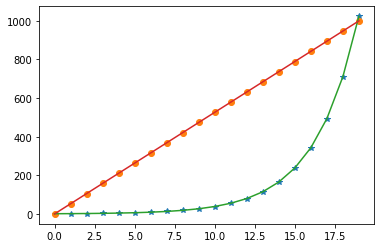

In [45]:
N = 20
x = np.arange(N)
y1 = np.linspace(0, 10, N) * 100
y2 = np.logspace(0, 10, N, base=2)

plt.plot(x, y2, '*');
plt.plot(x, y1, 'o');
plt.plot(x, y2);
plt.plot(x, y1);

In [46]:
# 检查每个元素是否为 True
# base 的 指数为 linspace 得到的就是 logspace
y2 = np.logspace(0, 10, N, base=2)
print(y2)
print(np.linspace(0, 10, N))
np.alltrue(2 ** np.linspace(0, 10, N)  == y2)

[1.00000000e+00 1.44024654e+00 2.07431009e+00 2.98751792e+00
 4.30276234e+00 6.19703857e+00 8.92526334e+00 1.28545796e+01
 1.85137638e+01 2.66643842e+01 3.84032870e+01 5.53102012e+01
 7.96603257e+01 1.14730508e+02 1.65240217e+02 2.37986651e+02
 3.42759450e+02 4.93658111e+02 7.10989385e+02 1.02400000e+03]
[ 0.          0.52631579  1.05263158  1.57894737  2.10526316  2.63157895
  3.15789474  3.68421053  4.21052632  4.73684211  5.26315789  5.78947368
  6.31578947  6.84210526  7.36842105  7.89473684  8.42105263  8.94736842
  9.47368421 10.        ]


True

>⚠️ 补充：关于 array 的条件判断

In [48]:
# 不能直接用 if 判断 array 是否符合某个条件
arr = np.array([1, 2, 3])
cond1 = arr > 2
cond1

array([False, False,  True])

In [49]:
if cond1:
    print("forbid")

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [52]:
# 即便你全是 True 它也不行
arr = np.array([1, 2, 3])
cond2 = arr > 0
if cond2:
    print("forbid")

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [53]:
# 咱们只能用 any 或 all，这个很容易犯错，请务必注意。
if cond1.any():
    print("if any")

if any


In [54]:
if cond2.all():
    print("all conform")

all conform


### 使用 ones/zeros 创建

⭐

创建全 1/0 array 的快捷方式。需要注意的是 `np.zeros_like` 或 `np.ones_like`，二者可以快速生成给定 array 一样 shape 的 0 或 1 向量，这在需要 Mask 某些位置时可能会用到。

⚠️ 需要注意的是：创建出来的 array 默认是 float 类型。

In [14]:
np.ones(3)

array([1., 1., 1.])

In [15]:
np.ones((2, 3))

array([[1., 1., 1.],
       [1., 1., 1.]])

In [16]:
np.zeros((2,3,4))

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]])

In [20]:
# 像给定向量那样的 0 向量（ones_like 是 1 向量）
print(np.zeros_like(np.ones((2,3,3))))
print()
print(np.zeros((2, 3, 3)))

[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]

[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


### 使用 random 生成

⭐⭐⭐⭐⭐

如果要在这一节选一个最重要的 API，那一定是 `random` 无疑了，这里我们只介绍几个比较常用的「生产」数据相关的 API。它们经常用于随机生成训练或测试数据，神经网络初始化等。

⚠️ 需要注意的是：这里我们统一推荐使用新的 API 方式创建，即通过 `np.random.default_rng()` 先生成 `Generator`，然后再在此基础上生成各种分布的数据（记忆更加简便清晰）。不过我们依然会介绍就的 API 用法，因为很多代码中使用的还是旧的，您可以混个眼熟。

In [21]:
# 0-1 连续均匀分布
np.random.rand(2, 3)

array([[0.23511762, 0.56873818, 0.19230021],
       [0.47678832, 0.11952355, 0.75690817]])

In [22]:
# 单个数
np.random.rand()

0.026720452251105864

In [23]:
# 0-1 连续均匀分布
np.random.random((3, 2))

array([[0.12704412, 0.87995251],
       [0.93294237, 0.74835318],
       [0.38123491, 0.17622784]])

In [24]:
# 指定上下界的连续均匀分布
np.random.uniform(-1, 1, (2, 3))

array([[-0.05284349,  0.6926759 , -0.20222092],
       [-0.67202489, -0.82207286, -0.35224038]])

In [29]:
# 上面两个的区别是 shape 的输入方式不同，无伤大雅了
# 不过从 1.17 版本后推荐这样使用（以后大家可以用新的方法）
# rng 是个 Generator，可用于生成各种分布
rng = np.random.default_rng()
rng

Generator(PCG64) at 0x7F7C212E2900

In [31]:
# 推荐的连续均匀分布用法
rng.random((2, 3))

array([[0.9107567 , 0.06506072, 0.86699795],
       [0.75217545, 0.1122304 , 0.43446212]])

In [32]:
# 可以指定上下界，所以更加推荐这种用法
rng.uniform(0, 1, (2, 3))

array([[0.62266463, 0.28701591, 0.18979229],
       [0.3687113 , 0.036197  , 0.07882013]])

In [45]:
# 随机整数（离散均匀分布），不超过给定的值（10）
np.random.randint(10, size=2)
rng.integers(100, size=(2, 3, 4))

array([[[85, 52, 12, 72],
        [67, 36, 60, 38],
        [34, 15, 66, 72]],

       [[53, 74, 25, 91],
        [92, 47, 14, 82],
        [19, 96, 95, 12]]])

In [65]:
# 随机整数（离散均匀分布），指定上下界和 shape
np.random.randint(0, 10, (2, 3))

array([[8, 6, 1],
       [3, 8, 1]])

In [80]:
# 上面推荐的方法，指定大小和上界
rng.integers(10, size=2)

array([9, 7])

In [75]:
# 上面推荐的方法，指定上下界
rng.integers(0, 10, (2, 3))

array([[5, 9, 1],
       [8, 5, 7]])

In [46]:
# 标准正态分布
np.random.randn(2, 4)

array([[ 0.93683173,  2.38393906,  0.57788267, -0.5334681 ],
       [-1.52991914,  0.62929602,  0.05369557, -0.13152785]])

In [47]:
# 上面推荐的标准正态分布用法
rng.standard_normal((2, 4))

array([[-1.79525432, -1.38237624,  0.14253015,  0.04605839],
       [-0.81882286,  0.67042747, -0.45443588,  0.21584334]])

In [48]:
# 高斯分布
np.random.normal(0, 1, (3, 5))

array([[ 1.95669512,  0.93688944,  0.48398256, -0.04549099,  0.76186406],
       [ 0.15061773, -0.06229197,  1.21008594, -0.92912982,  0.51459415],
       [ 1.11429824, -0.35216788, -0.90877768,  0.96629564,  0.5854418 ]])

In [90]:
# 上面推荐的高斯分布用法
rng.normal(0, 1, (3, 5))

array([[ 2.20602146, -2.17590933,  0.80605092, -1.75363919,  0.08712213],
       [ 0.33164095,  0.33921626,  0.45251278, -0.03281331, -0.74066207],
       [-0.61835785, -0.56459129,  0.37724436, -0.81295739,  0.12044035]])

总之，一般会用的就是2个分布：均匀分布和正态（高斯）分布。另外，`size` 可以指定 shape。

In [211]:
rng = np.random.default_rng()

In [212]:
# 离散均匀分布
rng.integers(low=0, high=10, size=5)

array([0, 7, 6, 4, 4])

In [213]:
# 连续均匀分布
rng.uniform(low=0, high=10, size=5)

array([6.97368029, 0.94177348, 9.75622352, 7.61139702, 7.86064305])

In [214]:
# 正态（高斯）分布
rng.normal(loc=0.0, scale=1.0, size=(2, 3))

array([[-0.01680116, -0.85304393,  0.87939797],
       [ 0.77779194,  0.0660307 ,  1.12724121]])

### 从文件读取

⭐⭐⭐⭐⭐


这小节主要用于加载实现存储好的权重参数或预处理好的数据集，有时候会比较方便，比如训练好的模型参数加载到内存里用来提供推理服务，或者耗时很久的预处理数据直接存起来，多次实验时不需要重新处理。

⚠️ 需要注意的是：存储时不需要写文件名后缀，会自动添加。
在[人智导](https://github.com/zhaochenyang20/IAI_2022)中可以优雅地使用，但是请自行学习 `allow_pickle` 参数，此处给出[输入法大作业](https://github.com/zhaochenyang20/IAI_2022/blob/main/homework/input-method/src/pinyin.py)里的一个例子：
``` Python
dictionary = np.load(Path.cwd() / "dictionary.npz", allow_pickle=True)["dic"].item()
one, two, three = [Counter(each[1].item()) for each in np.load(Path.cwd() / "full_set.npz", allow_pickle=True).items()]
```

In [49]:
# 直接将给定矩阵存为 a.npy
np.save('./data/a', np.array([[1, 2, 3], [4, 5, 6]]))

In [50]:
# 可以将多个矩阵存在一起，名为 `b.npz`
np.savez("./data/b", a=np.arange(12).reshape(3, 4), b=np.arange(12.).reshape(4, 3))

In [51]:
# 和上一个一样，只是压缩了
np.savez_compressed("./data/c", a=np.arange(12).reshape(3, 4), b=np.arange(12.).reshape(4, 3))

In [52]:
# 加载单个 array
np.load("data/a.npy")

array([[1, 2, 3],
       [4, 5, 6]])

In [53]:
# 加载多个，可以像字典那样取出对应的 array
arr = np.load("data/b.npz")

In [54]:
arr["a"]

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [55]:
arr["b"]

array([[ 0.,  1.,  2.],
       [ 3.,  4.,  5.],
       [ 6.,  7.,  8.],
       [ 9., 10., 11.]])

In [56]:
# 后缀都一样，你干脆当它和上面的没区别即可
arr = np.load("data/c.npz")

In [57]:
arr["b"]

array([[ 0.,  1.,  2.],
       [ 3.,  4.,  5.],
       [ 6.,  7.,  8.],
       [ 9., 10., 11.]])

## 统计和属性

本节我们从 array 的基本统计属性入手，对刚刚创建的 array 进一步的了解。主要包括以下几个方面：

- 尺寸相关
- 最大、最小、中位、分位值
- 平均、求和、标准差等

都是描述性统计相关的指标，对于我们从整体了解一个 array 很有帮助。其中，用到最多的是尺寸相关的「`shape`」，最大、最小值，平均值、求和等。

本节的内容非常简单，您只需要特别关注（记住）两个重要的特性：

- 按维度（指定 axis）求结果。一般0表示列1表示行，可以用「**沿着行/列操作**」这样理解，不确定时可以拿个例子试一下。
- 计算后保持维度（`keepdims=True`）


**另外，为了便于操作，我们使用一个随机生成的 array 作为操作对象；同时，我们指定了 seed，这样每次运行，每个人看到的结果都是一样的。一般我们在训练模型时，往往需要指定 seed，这样才能在「同等条件」下进行调参。**

In [59]:
#  先创建一个 Generator
rng = np.random.default_rng(seed=42)
#  再生成一个均匀分布
arr = rng.uniform(0, 1, (3, 4))
arr

array([[0.77395605, 0.43887844, 0.85859792, 0.69736803],
       [0.09417735, 0.97562235, 0.7611397 , 0.78606431],
       [0.12811363, 0.45038594, 0.37079802, 0.92676499]])

### 尺寸相关

⭐⭐

这一小节主要包括：维度、形状和数据量，其中形状 `shape` 我们用到的最多。

⚠️ 需要注意的是：size 不是 shape，ndim 表示有几个维度。

In [60]:
# 维度，array 是二维的（两个维度）
arr.ndim

2

#### `np.shape`

In [61]:
# 形状，返回一个 Tuple
arr.shape

(3, 4)

In [62]:
# 数据量
arr.size

12

### 最值分位

⭐⭐⭐

这一小节主要包括：最大值、最小值、中位数、其他分位数，其中『**最大值和最小值**』我们平时用到的最多。

⚠️ 需要注意的是：分位数可以是 0-1 的任意小数（表示对应分位），而且分位数并不一定在原始的 array 中。

In [63]:
arr

array([[0.77395605, 0.43887844, 0.85859792, 0.69736803],
       [0.09417735, 0.97562235, 0.7611397 , 0.78606431],
       [0.12811363, 0.45038594, 0.37079802, 0.92676499]])

In [64]:
# 所有元素中最大的
arr.max()

0.9756223516367559

#### `np.max/min`

In [65]:
# 按维度（列）最大值
arr.max(axis=0)

array([0.77395605, 0.97562235, 0.85859792, 0.92676499])

In [66]:
# 同理，按行
arr.max(axis=1)

array([0.85859792, 0.97562235, 0.92676499])

In [67]:
# 是否保持原来的维度
# 这个需要特别注意下，很多深度学习模型中都需要保持原有的维度进行后续计算
# shape 是 (3,1)，array 的 shape 是 (3,4)，按行，同时保持了行的维度
arr.min(axis=1, keepdims=True)

array([[0.43887844],
       [0.09417735],
       [0.12811363]])

In [68]:
# 保持维度：（1，4），原始array是（3，4）
arr.min(axis=0, keepdims=True)

array([[0.09417735, 0.43887844, 0.37079802, 0.69736803]])

In [69]:
# 一维了
arr.min(axis=0, keepdims=False)

array([0.09417735, 0.43887844, 0.37079802, 0.69736803])

---

In [164]:
# 也即 arrey max，另一种用法，不过我们一般习惯使用上面的用法，其实两者一回事
np.amax(arr, axis=0)

array([0.77395605, 0.97562235, 0.85859792, 0.92676499])

In [70]:
# 同 amax
np.amin(arr, axis=1)
np.amin(arr, axis=0)

array([0.09417735, 0.43887844, 0.37079802, 0.69736803])

In [71]:
# 中位数
# 其他用法和 max，min 是一样的
np.median(arr)

0.7292538655248584

In [72]:
# 分位数，按列取1/4数
np.quantile(arr, q=0.25, axis=0)

array([0.11114549, 0.44463219, 0.56596886, 0.74171617])

In [75]:
# 分位数，按行取 3/4，同时保持维度
np.quantile(arr, q=0.5, axis=1, keepdims=True)

array([[0.73566204],
       [0.773602  ],
       [0.41059198]])

In [188]:
# 分位数，注意，分位数可以是 0-1 之间的任何数字（分位）
# 如果是 1/2 分位，那正好是中位数
np.quantile(arr, q=1/2, axis=1)

array([0.73566204, 0.773602  , 0.41059198])

### 平均求和标准差

⭐⭐⭐

这一小节主要包括：平均值、累计求和、方差、标准差等进一步的统计指标。其中使用最多的是「平均值」。

In [77]:
arr

array([[0.77395605, 0.43887844, 0.85859792, 0.69736803],
       [0.09417735, 0.97562235, 0.7611397 , 0.78606431],
       [0.12811363, 0.45038594, 0.37079802, 0.92676499]])

#### `np.average`

In [401]:
# 平均值
np.average(arr)

0.6051555606435642

In [78]:
# 按维度平均（列）
np.average(arr, axis=0)

array([0.33208234, 0.62162891, 0.66351188, 0.80339911])

---

In [197]:
# 另一个计算平均值的 API
# 它与 average 的主要区别是，np.average 可以指定权重，即可以用于计算加权平均
# 一般建议使用 average，忘掉 mean 吧！
np.mean(arr, axis=0)

array([0.33208234, 0.62162891, 0.66351188, 0.80339911])

#### `np.sum`

In [399]:
# 求和，不多说了，类似
np.sum(arr, axis=1)

array([2.76880044, 2.61700371, 1.87606258])

In [400]:
np.sum(arr, axis=1, keepdims=True)

array([[2.76880044],
       [2.61700371],
       [1.87606258]])

---

In [200]:
# 按列累计求和
np.cumsum(arr, axis=0)

array([[0.77395605, 0.43887844, 0.85859792, 0.69736803],
       [0.8681334 , 1.41450079, 1.61973762, 1.48343233],
       [0.99624703, 1.86488673, 1.99053565, 2.41019732]])

In [201]:
# 按行累计求和
np.cumsum(arr, axis=1)

array([[0.77395605, 1.21283449, 2.07143241, 2.76880044],
       [0.09417735, 1.0697997 , 1.8309394 , 2.61700371],
       [0.12811363, 0.57849957, 0.94929759, 1.87606258]])

In [79]:
# 标准差，用法类似
np.std(arr)

0.28783096517727075

In [205]:
# 按列求标准差
np.std(arr, axis=0)

array([0.3127589 , 0.25035525, 0.21076935, 0.09444968])

In [207]:
# 方差
np.var(arr, axis=1)

array([0.02464271, 0.1114405 , 0.0839356 ])

## 形状和转换

array 大多数情况下都是以多维的形式出现的，一般对超过二维的多维 array 称为「张量」，二维矩阵，一维向量。因为多维度，所以自然而然地涉及到形状的改变和转换，可以算是张量最基础的「操作」了。

本节我们主要涉及以下三个方面：

- 改变形状
- 反序
- 转置

其中，改变形状和转置都非常常用，我们建议您熟练掌握。

### 改变形状

⭐⭐⭐⭐⭐

这小节里面的 API 使用非常高频，尤其是扩展 1 维度的 `expand_dims` 和去除 1 维度的 `squeeze`，您未来会在很多神经网络架构中看到这俩货的身影。

⚠️ 需要注意的是：无论是扩展还是缩减，多或少的 shape 都是 1，`squeeze` 时如果指定维度，则该维度 shape 必须是 1。

In [12]:
# 换个整数的随机 array
rng = np.random.default_rng(seed=42)
arr = rng.integers(1, 100, (3, 4, 2))
print(arr)
print("arr[0]")
print(arr[0])
print("arr[:, 0]")
print(arr[:, 0])
print("arr[:, :, 0]")
print(arr[:, :, 0])

[[[ 9 77]
  [65 44]
  [43 86]
  [ 9 70]]

 [[20 10]
  [53 97]
  [73 76]
  [72 78]]

 [[51 13]
  [84 45]
  [50 37]
  [19 92]]]
arr[0]
[[ 9 77]
 [65 44]
 [43 86]
 [ 9 70]]
arr[:, 0]
[[ 9 77]
 [20 10]
 [51 13]]
arr[:, :, 0]
[[ 9 65 43  9]
 [20 53 73 72]
 [51 84 50 19]]


In [13]:
# 有时候您可能需要将多维 array 打平
arr = arr.ravel()
arr

array([ 9, 77, 65, 44, 43, 86,  9, 70, 20, 10, 53, 97, 73, 76, 72, 78, 51,
       13, 84, 45, 50, 37, 19, 92])

In [8]:
arr.shape

(24,)

#### `np.expand_dims`

In [10]:
#### 扩展 1 个维度，需要（必须）指定维度
# 其实就是多嵌套了一下
arr = rng.integers(1, 100, (3, 4))
print(arr)
print(arr[0])
print()
print(arr[:, 0])
print()
print(arr)
print()
arr = np.expand_dims(arr, 0)
print(arr[0])
print()
print(arr[:, 0])
print()
print(arr)
print()

[[85 82 28 63]
 [17 76 70 36]
 [ 7 97 45 89]]
[85 82 28 63]

[85 17  7]

[[85 82 28 63]
 [17 76 70 36]
 [ 7 97 45 89]]

[[85 82 28 63]
 [17 76 70 36]
 [ 7 97 45 89]]

[[85 82 28 63]]

[[[85 82 28 63]
  [17 76 70 36]
  [ 7 97 45 89]]]



In [56]:
# 扩充维度
rng = np.random.default_rng(seed=42)
arr = rng.integers(1, 100, (3, 4))
expanded = np.expand_dims(arr, axis=(1, 2, 4))
print(expanded.shape)
expanded = np.expand_dims(arr, axis=(1, 3, 4))
print(expanded.shape)

(3, 1, 1, 4, 1)
(3, 1, 4, 1, 1)


In [57]:
# 扩充维度不能跳跃
expanded = np.expand_dims(arr, axis=(1, 3, 8))

AxisError: axis 8 is out of bounds for array of dimension 5

关于数组切片有一点很重要也非常有用，那就是数组切片返回的是数组数据的视图，而不是数值数据的副本。这一点也是 NumPy 数组切片和 Python 列表切片的不同之处：在 Python 列表中，切片是值的副本。具体可以查看下方例子：

In [71]:
rng = np.random.default_rng(seed=42)
x2 = rng.integers(10, size=(3, 4))
print(x2)
x3 = x2[0]
x4 = x2[:, 0]
print("__slice__")
print(x3)
print(x4)
x3[0] = 1
print("__change the line__")
print(x2)
x4[2] = 10
print("__change the column__")
print(x2)

[[0 7 6 4]
 [4 8 0 6]
 [2 0 5 9]]
__slice__
[0 7 6 4]
[0 4 2]
__change the line__
[[1 7 6 4]
 [4 8 0 6]
 [2 0 5 9]]
__change the column__
[[ 1  7  6  4]
 [ 4  8  0  6]
 [10  0  5  9]]


与此对比，Python 原生列表表现如下:

In [72]:
lecturer_list = ["c7w", "lambda", "Alan", "xsun2001", "ayf"]
singler_list = lecturer_list[:-2]
print(singler_list)
singler_list[-1] = "Eren"
print(singler_list)
print(lecturer_list)

['c7w', 'lambda', 'Alan']
['c7w', 'lambda', 'Eren']
['c7w', 'lambda', 'Alan', 'xsun2001', 'ayf']


#### `np.squeeze`

In [58]:
# squeeze 指定 axis 的shape必须为1
squeezd = np.squeeze(expanded, axis=(1, 3, 4))
print(squeezd.shape)

(3, 4)


In [129]:
# 如果指定了维度，那就只会去除该维度，指定的维度必须为 1
print(expanded.shape)
squeezed = np.squeeze(expanded, axis=1).squeeze(axis=2).squeeze(axis=2)
print(squeezed.shape)

(3, 1, 4, 1, 1)


(3, 4)

In [130]:
# 去除所有维度为 1 的
np.squeeze(expanded).shape

(3, 4)

#### `np.reshape/arr.reshape`

In [133]:
# reshape 成另一个形状
# 也可以直接变为一维向量
print(arr)
arr.reshape(2, 2, 3)

[[47 78  7  9]
 [28 49 67 49]
 [44 93 16 57]]


array([[[47, 78,  7],
        [ 9, 28, 49]],

       [[67, 49, 44],
        [93, 16, 57]]])

In [134]:
# 可以偷懒，使用 -1 表示其他维度（此处 -1 为 3），注意，reshape 参数可以是 tuple 或连续整数
arr1 = arr.reshape((4, -1))
arr1

array([[47, 78,  7],
       [ 9, 28, 49],
       [67, 49, 44],
       [93, 16, 57]])

In [348]:
# 元素数量必须与原array一致
arr.reshape(3, 3)

ValueError: cannot reshape array of size 12 into shape (3,3)

---

In [135]:
# 另一种变换形状的方式 —— 原地变换
# 不过不能用-1
# 另外 resize 不一定和原来的元素数量一样多
arr2 = arr.resize((4, 3))
# 注意：上面的 reshape 会生成一个新的 array，但 resize 不会，所以我们需要用原变量名将它显示出来
# arr2 没有值
arr2

In [139]:
arr

array([[47, 78,  7],
       [ 9, 28, 49],
       [67, 49, 44],
       [93, 16, 57]])

In [137]:
# 直接 resize，如果元素数量多时会提示错误
arr.resize((2, 3))

ValueError: cannot resize an array that references or is referenced
by another array in this way.
Use the np.resize function or refcheck=False

In [140]:
# 可以copy一份
arrcopy = np.copy(arr)
arrcopy.resize((2, 3))
arrcopy

array([[47, 78,  7],
       [ 9, 28, 49]])

In [138]:
# arr 保持不变
arr

array([[47, 78,  7],
       [ 9, 28, 49],
       [67, 49, 44],
       [93, 16, 57]])

In [141]:
# 也可以将 refcheck 设为 False
# 此时 arr 会发生变化
# 元素数量超出时，截断；元素数量不够时，0填充
arr.resize((2,3), refcheck=False)
arr

array([[47, 78,  7],
       [ 9, 28, 49]])

In [142]:
arr.resize((3, 3), refcheck=False)
arr

array([[47, 78,  7],
       [ 9, 28, 49],
       [ 0,  0,  0]])

In [143]:
arr

array([[47, 78,  7],
       [ 9, 28, 49],
       [ 0,  0,  0]])

In [145]:
# 如果用 np.resize 会略有不同
# 元素数量不够时，会自动复制
np.resize(arr, (5, 3))

array([[47, 78,  7],
       [ 9, 28, 49],
       [ 0,  0,  0],
       [47, 78,  7],
       [ 9, 28, 49]])

In [146]:
# 元素数量多出来时，会自动截断
np.resize(arr, (2, 2))

array([[47, 78],
       [ 7,  9]])

### 反序

⭐

也可以看作是一种对原数组的转换，用的不多，可以了解一下，为接下来的索引和切片做个热身。

如果给一个字符串或数组让您反序，您可能会想到很多种方法，比如：`reversed`，或者写一个方法，或者用 Python list 的索引功能，而这也是 `numpy` 中 array 反序的方式。

In [147]:
# 字符串
s = "uevol"
s[::-1]

'loveu'

In [148]:
# 数组
lst = [1, "1", 5.2]
lst[::-1]

[5.2, '1', 1]

In [149]:
arr

array([[47, 78,  7],
       [ 9, 28, 49],
       [ 0,  0,  0]])

In [150]:
arr

array([[47, 78,  7],
       [ 9, 28, 49],
       [ 0,  0,  0]])

In [151]:
# 我们按上面的套路：默认列反序
arr[::-1]

array([[ 0,  0,  0],
       [ 9, 28, 49],
       [47, 78,  7]])

In [287]:
# 列不变行反序
arr[::-1, :]

array([[10, 53, 97],
       [ 9, 70, 20],
       [44, 43, 86],
       [ 9, 77, 65]])

In [288]:
# 在不同维度上操作：行不变列反序
arr[:, ::-1]

array([[65, 77,  9],
       [86, 43, 44],
       [20, 70,  9],
       [97, 53, 10]])

In [291]:
# 行变列也变
arr[::-1, ::-1]

array([[97, 53, 10],
       [20, 70,  9],
       [86, 43, 44],
       [65, 77,  9]])

### 转置

⭐⭐⭐

转置是线性代数的基本操作，拿二维矩阵为例，通俗理解就是把它放倒，shape 反转，行变成列，列成为行。当然，对于多维也是类似的。我们建议您二维矩阵用 `arr.T`（会快很多），超过二维的张量可以用 `np.transpose`，会更加灵活些。

⚠️ 需要注意的是：一维数组转置还是自己。

In [2]:
# 一维
print(np.array([[1, 2, 3]]))
print(np.array([[1, 2, 3]]).shape)
print(np.array([[1, 2, 3]]).T)
print(np.array([[1,2, 3]]).T.shape)

[[1 2 3]]
(1, 3)
[[1]
 [2]
 [3]]
(3, 1)


#### `arr.T`

In [8]:
# 简便用法，把所有维度顺序都给倒过来
rng = np.random.default_rng(seed=42)
arr = rng.integers(1, 100, (3, 4))
print(arr)
print(arr.shape)
print(arr.T)
print(arr.T.shape)

[[ 9 77 65 44]
 [43 86  9 70]
 [20 10 53 97]]
(3, 4)
[[ 9 43 20]
 [77 86 10]
 [65  9 53]
 [44 70 97]]
(4, 3)


In [9]:
# 将 shape=(1,1,3,4) 的转置后得到 shape=(4,3,1,1)
arr.reshape(1, 1, 3, 4).T.shape

(4, 3, 1, 1)

In [10]:
# 同上
arr.reshape(1, 2, 2, 1, 3, 1).T.shape

(1, 3, 1, 2, 2, 1)

#### `np.transpose`

In [11]:
# 这种转置方式可以指定 axes
np.transpose(arr)

array([[ 9, 43, 20],
       [77, 86, 10],
       [65,  9, 53],
       [44, 70, 97]])

In [13]:
# 不指定 axes 时和 .T 是一样的
np.transpose(arr.reshape(1, 2, 2, 1, 3, 1)).shape

(1, 3, 1, 2, 2, 1)

In [17]:
# 指定 axes，不过 axes 数量必须包含所有维度的序列
# 比如两个维度就是 (0, 1)，四个就是 (0, 1, 2, 3)
# 当然，顺序可以改变，比如下面就是只转置第 2 个和第 3 个维度
# 注意，只有超过 2 维时，这样才有意义
# 下面的结果中，中间2个维度被调换顺序了，顺序就在axes中指定的
print(arr.reshape(1, 1, 3, 4))
print(arr.reshape(1, 1, 3, 4).shape)
print(np.transpose(arr.reshape(1, 1, 3, 4), (0, 2, 1, 3)))
np.transpose(arr.reshape(1, 1, 3, 4), axes=(0, 2, 1, 3)).shape

[[[[ 9 77 65 44]
   [43 86  9 70]
   [20 10 53 97]]]]
(1, 1, 3, 4)
[[[[ 9 77 65 44]]

  [[43 86  9 70]]

  [[20 10 53 97]]]]


(1, 3, 1, 4)

## 分解和组合

这节我们主要学习 array 的分解和组合，本节是所有章节中最重要的一节，通过本节内容，您可以充分了解 `numpy`（以及 Python 语言）的强大，这种操作上的优雅不能说后无来者，但至少前无古人了。

内容大致包括以下小节：

- 切片和索引
- 拼接
- 重复
- 分拆

其中，重中之重是「切片和索引」，它基础、它高频、它无处不在。我们强烈建议您熟练掌握，其他三个相对简单，只需要各记住一个 API 即可。

### 切片和索引

⭐⭐⭐⭐⭐

划重点！切片和索引是通过对已有 array 进行操作而得到想要的「部分」元素的行为过程。其核心动作可以概括为：按维度根据 `start:stop:step` 操作 array。

这部分内容的核心是把处理按维度分开，不处理的维度统一用 `:` 或 `...` 代替；在看操作时，也要首先关注「`,`」在哪里。要处理的维度和之前 `arange` `linspace` 等接口使用方法是一样的。

⚠️ 需要注意的是：引支持负数，即从后往前索引。

In [18]:
rng = np.random.default_rng(42)
arr = rng.integers(0, 20, (5, 4))
arr

array([[ 1, 15, 13,  8],
       [ 8, 17,  1, 13],
       [ 4,  1, 10, 19],
       [14, 15, 14, 15],
       [10,  2, 16,  9]])

#### `index/slice`

In [19]:
# 取第 0 行
print(arr)
arr[0]

array([ 1, 15, 13,  8])

In [20]:
# 取第 0 行第 1 个元素
arr[0, 1]

15

In [34]:
# 然后带点范围 第 1-2 行
arr[0:3]

array([[ 1, 15, 13,  8],
       [ 8, 17,  1, 13],
       [ 4,  1, 10, 19]])

In [21]:
# 离散也可以：第 1，3 行
arr[[0, 3]]

array([[ 1, 15, 13,  8],
       [14, 15, 14, 15]])

In [379]:
arr

array([[ 1, 15, 13,  8],
       [ 8, 17,  1, 13],
       [ 4,  1, 10, 19],
       [14, 15, 14, 15],
       [10,  2, 16,  9]])

In [22]:
# 再来加上维度：第 1-2 行，第 1 列
arr[1:3, 1]

array([17,  1])

In [23]:
# 离散也是一样：第 1，3 行，第 0 列
arr[[1,3], [0]]

array([ 8, 14])

In [24]:
# 还可以有简写：到最后或到开始。如第 3 行到最后一行
arr[3:]

array([[14, 15, 14, 15],
       [10,  2, 16,  9]])

In [26]:
# 开始到第 3 行，第 1-3 列
print(arr)
arr[:3, 1:3]

[[ 1 15 13  8]
 [ 8 17  1 13]
 [ 4  1 10 19]
 [14 15 14 15]
 [10  2 16  9]]


array([[15, 13],
       [17,  1],
       [ 1, 10]])

In [384]:
# 还可以来点跳跃，步长：start:stop:step，第 1 行到第 4 行，间隔为 2，即第 1、3 行
print(arr)
arr[1: 4: 2]

array([[ 8, 17,  1, 13],
       [14, 15, 14, 15]])

In [27]:
# 加上列也可以哦，第 1、3 行，第 0、2 列
arr[1:4:2, 0:3:2]

array([[ 8,  1],
       [14, 14]])

In [32]:
# 第一列的值，其实是所有其他维度第 1 维的值
print(arr)
print(arr[:, 1])
print(arr[..., 1])
print(arr[..., 1].shape)

[[ 1 15 13  8]
 [ 8 17  1 13]
 [ 4  1 10 19]
 [14 15 14 15]
 [10  2 16  9]]
[15 17  1 15  2]
[15 17  1 15  2]
(5,)


In [33]:
# 与上面类似，但用的更多
arr[:,1]

array([15, 17,  1, 15,  2])

### 拼接

⭐⭐⭐⭐

有时候我们需要对已有的几个 array 进行拼接以形成一个大的 array（常见的例子比如不同类型特征的拼接）。本小节严格来说只有两个 API：`np.concatenate` 和 `np.stack`，前者是拼接，后者是堆叠（会增加一个维度），都可以指定维度。记住，有它俩就够了。

⚠️ 需要注意的是：`hstack` 和 `vstack` 和 `stack` 没关系，反而是 `concatenate`。

In [36]:
rng = np.random.default_rng(42)

arr1 = rng.random((2, 3))
arr2 = rng.random((2, 3))
print(arr1)
print(arr2)
print(arr1.shape)
print(arr2.shape)

[[0.77395605 0.43887844 0.85859792]
 [0.69736803 0.09417735 0.97562235]]
[[0.7611397  0.78606431 0.12811363]
 [0.45038594 0.37079802 0.92676499]]
(2, 3)
(2, 3)


#### `np.concatenate`

In [38]:
# 默认沿axis=0（列）连接
print(np.concatenate((arr1, arr2)))
print(np.concatenate((arr1, arr2)).shape)
print(np.concatenate((arr1, arr2), axis=1))
print(np.concatenate((arr1, arr2), axis=1).shape)

[[0.77395605 0.43887844 0.85859792]
 [0.69736803 0.09417735 0.97562235]
 [0.7611397  0.78606431 0.12811363]
 [0.45038594 0.37079802 0.92676499]]
(4, 3)
[[0.77395605 0.43887844 0.85859792 0.7611397  0.78606431 0.12811363]
 [0.69736803 0.09417735 0.97562235 0.45038594 0.37079802 0.92676499]]
(2, 6)


In [78]:
# 竖直按行顺序拼接
# 注意：vstack 虽然看起来是 stack，但其实它是 concatenate，建议您只使用 np.concatenate
np.vstack((arr1, arr2))

array([[0.77395605, 0.43887844, 0.85859792],
       [0.69736803, 0.09417735, 0.97562235],
       [0.7611397 , 0.78606431, 0.12811363],
       [0.45038594, 0.37079802, 0.92676499]])

In [83]:
# 水平按列顺序拼接
# 道理和 vstack 一样，建议使用 `np.concatenate` axis=1
np.hstack((arr1, arr2))

array([[0.77395605, 0.43887844, 0.85859792, 0.7611397 , 0.78606431,
        0.12811363],
       [0.69736803, 0.09417735, 0.97562235, 0.45038594, 0.37079802,
        0.92676499]])

#### `np.stack`

In [39]:
# 堆叠，默认根据 axis=0 进行
np.stack((arr1, arr2))

array([[[0.77395605, 0.43887844, 0.85859792],
        [0.69736803, 0.09417735, 0.97562235]],

       [[0.7611397 , 0.78606431, 0.12811363],
        [0.45038594, 0.37079802, 0.92676499]]])

In [40]:
_.shape

(2, 2, 3)

In [46]:
# 堆叠，根据 axis=2
print(np.stack((arr1, arr2), axis=1))
print(np.stack((arr1, arr2), axis=1).shape)
print(np.stack((arr1, arr2), axis=2))
np.stack((arr1, arr2), axis=2).shape

[[[0.77395605 0.43887844 0.85859792]
  [0.7611397  0.78606431 0.12811363]]

 [[0.69736803 0.09417735 0.97562235]
  [0.45038594 0.37079802 0.92676499]]]
(2, 2, 3)
[[[0.77395605 0.7611397 ]
  [0.43887844 0.78606431]
  [0.85859792 0.12811363]]

 [[0.69736803 0.45038594]
  [0.09417735 0.37079802]
  [0.97562235 0.92676499]]]


(2, 3, 2)

In [92]:
# _ 表示上一个 Cell 的输出结果
_.shape

(2, 3, 2)

---

In [96]:
# 纵深按 axis=2 堆叠，不管它就行，我们认准 `stack`
np.dstack((arr1, arr2))

array([[[0.77395605, 0.7611397 ],
        [0.43887844, 0.78606431],
        [0.85859792, 0.12811363]],

       [[0.69736803, 0.45038594],
        [0.09417735, 0.37079802],
        [0.97562235, 0.92676499]]])

In [94]:
_.shape

(2, 3, 2)

### 重复

⭐⭐⭐

重复其实是另一种拼接方式，它也可以指定要重复的维度。在有些深度学习模型数据构建中非常有用（方便）。

⚠️ 需要注意的是：是一个维度一个维度依次重复，而不是整个 array 重复。

In [ ]:
rng = np.random.default_rng(42)
arr = rng.integers(0, 10, (3, 4))
arr

In [67]:
# 在 axis=0（沿着列）上重复 2 次
np.repeat(arr, 2, axis=0)

array([[0, 7, 6, 4],
       [0, 7, 6, 4],
       [4, 8, 0, 6],
       [4, 8, 0, 6],
       [2, 0, 5, 9],
       [2, 0, 5, 9]])

In [68]:
# 在 axis=1（沿着行）上重复 3 次
np.repeat(arr, 3, axis=1)

array([[0, 0, 0, 7, 7, 7, 6, 6, 6, 4, 4, 4],
       [4, 4, 4, 8, 8, 8, 0, 0, 0, 6, 6, 6],
       [2, 2, 2, 0, 0, 0, 5, 5, 5, 9, 9, 9]])

### 分拆

⭐⭐⭐

有拼接堆叠自然就有拆分，注意这不是切片和索引，就是将 array 拆成想要的几份。用的不是特别多，API 只要记住 `np.split` 就行了，其他的都是快捷方式。

⚠️ 需要注意的是：分拆的 axis 是对该维度进行拆分。

In [2]:
rng = np.random.default_rng(42)
arr = rng.integers(1, 100, (6, 4))
arr

array([[ 9, 77, 65, 44],
       [43, 86,  9, 70],
       [20, 10, 53, 97],
       [73, 76, 72, 78],
       [51, 13, 84, 45],
       [50, 37, 19, 92]])

#### `np.split`

In [3]:
# 默认切分列（axis=0），切成 3 份
np.split(arr, 3)

[array([[ 9, 77, 65, 44],
        [43, 86,  9, 70]]),
 array([[20, 10, 53, 97],
        [73, 76, 72, 78]]),
 array([[51, 13, 84, 45],
        [50, 37, 19, 92]])]

In [4]:
# （axis=1）切分行
np.split(arr, 2, axis=1)

[array([[ 9, 77],
        [43, 86],
        [20, 10],
        [73, 76],
        [51, 13],
        [50, 37]]),
 array([[65, 44],
        [ 9, 70],
        [53, 97],
        [72, 78],
        [84, 45],
        [19, 92]])]

---

In [123]:
# 和上面的一个效果
np.vsplit(arr, 3)

[array([[ 9, 77, 65, 44],
        [43, 86,  9, 70]]),
 array([[20, 10, 53, 97],
        [73, 76, 72, 78]]),
 array([[51, 13, 84, 45],
        [50, 37, 19, 92]])]

In [130]:
# 等价的用法
np.hsplit(arr, 2)

[array([[ 9, 77],
        [43, 86],
        [20, 10],
        [73, 76],
        [51, 13],
        [50, 37]]),
 array([[65, 44],
        [ 9, 70],
        [53, 97],
        [72, 78],
        [84, 45],
        [19, 92]])]

## 筛选和过滤

这小节与索引和切片有点类似，但倾向于从「整体」中统一筛选出「符合条件」的内容，而索引和切片更多的是依照「某种方法」切出一块内容。本小节内容同样非常重要，可以算第二个最重要的小节。主要包括以下内容：

- 条件筛选
- 提取（按条件）
- 抽样（按分布）
- 最大最小 index（特殊值）

这几个内容都很重要，使用的也非常高频。条件筛选经常用于 Mask 或异常值处理，提取则常用于结果过滤，抽样常用在数据生成（比如负样本抽样），最大最小 index 则常见于机器学习模型预测结果判定中（根据最大概率所在的 index 决定结果属于哪一类）。

In [71]:
rng = np.random.default_rng(42)
arr = rng.integers(1, 100, (3, 4))
arr

array([[ 9, 77, 65, 44],
       [43, 86,  9, 70],
       [20, 10, 53, 97]])

### 条件筛选

⭐⭐⭐

顾名思义，根据一定的条件对 array 进行筛选（标记）并后续处理。核心 API 是 `np.where`。

⚠️ 需要注意的是：where 分别返回各维度的 index，赋值的是「不满足」条件的。

In [5]:
# 条件筛选，可以直接在整个 array 上使用条件
arr > 50

array([[False,  True,  True, False],
       [False,  True, False,  True],
       [False, False,  True,  True],
       [ True,  True,  True,  True],
       [ True, False,  True, False],
       [False, False, False,  True]])

In [6]:
# 返回满足条件的索引，因为是两个维度，所以会返回两组结果
np.where(arr > 50)

(array([0, 0, 1, 1, 2, 2, 3, 3, 3, 3, 4, 4, 5]),
 array([1, 2, 1, 3, 2, 3, 0, 1, 2, 3, 0, 2, 3]))

In [7]:
# 不满足条件的赋值，将 <=50 的替换为 -1
np.where(arr > 50, arr, -1)

array([[-1, 77, 65, -1],
       [-1, 86, -1, 70],
       [-1, -1, 53, 97],
       [73, 76, 72, 78],
       [51, -1, 84, -1],
       [-1, -1, -1, 92]])

### 提取

⭐

在 array 中提取指定条件的值。

⚠️ 需要注意的是：提取和唯一值返回的都是一维向量。

In [8]:
# 提取指定条件的值
np.extract(arr > 50, arr)

array([77, 65, 86, 70, 53, 97, 73, 76, 72, 78, 51, 84, 92])

In [9]:
# 唯一值，是另一种形式的提取
np.unique(arr)

array([ 9, 10, 13, 19, 20, 37, 43, 44, 45, 50, 51, 53, 65, 70, 72, 73, 76,
       77, 78, 84, 86, 92, 97])

### 抽样

⭐⭐⭐⭐⭐

我们在跑模型时常常需要使用部分数据对整个过程快速验证，您当然可以使用 `np.random` 生成模拟数据。但有真实数据时，从真实数据中随机抽样会比较好。

⚠️ 需要注意的是：抽样的集合要求为一维向量（一般是数据的 index）。

In [36]:
rng = np.random.default_rng()
# 第一个参数是要抽样的集合，如果是一个整数，则表示从 0 到该值
# 第二个参数是样本大小
# 第三个参数表示结果是否可以重复
# 第四个参数表示出现的概率，长度和第一个参数一样

# 由于（0 1 2 3）中 2 和 3 的概率比较高，自然就选择了 2 和 3
rng.choice(4, 2, replace=False, p=[0.1, 0.2, 0.3, 0.4])
lst = ["la", "vida", "sola", "vivras"]
rng.choice(lst, 4, replace=False)

array(['vivras', 'sola', 'vida', 'la'], dtype='<U6')

In [38]:
# 旧的 API
# 如果是抽样语料的 index，更多的方法是这样：
data_size = 10000
np.random.choice(data_size, 50, replace=False)

array([2662, 3376, 2014, 7168, 8427, 6363,   99, 7311, 8411, 8792, 2672,
       7748, 2516, 1883, 5024,  949, 5835, 8755, 8743, 2405, 8092, 1632,
        295, 9851, 8405, 1652, 8930,   12, 3953, 5475,  694, 6834,  584,
       2610,  797, 4306, 5710, 9451, 3852, 9785, 8391, 4931, 2514, 8916,
       1317, 5859, 5602, 2338, 6438, 3890])

### 最值 Index

⭐⭐⭐⭐⭐

这小节主要是两个 API：`np.argmax(min)` 和 `np.argsort`，当然最常用的还是第一个，不用说，自然是可以（需要）指定 axis 的。

In [39]:
rng = np.random.default_rng(42)
arr = rng.uniform(1, 100, (3, 4))
arr

array([[77.62164881, 44.44896554, 86.00119407, 70.03943488],
       [10.32355744, 97.58661281, 76.3528305 , 78.82036622],
       [13.68324963, 45.58820785, 37.7090044 , 92.7497339 ]])

#### `np.argmax/argmin`

In [40]:
# 所有值中最大值的 Index，基本不这么用
np.argmax(arr)

5

In [42]:
# 按列（axis=0）最大值的 Index
np.argmax(arr, axis=0)

array([0, 1, 0, 2])

In [43]:
# 按行（axis=1）最小值的 Index
np.argmin(arr, axis=1)

array([1, 0, 0])

#### `np.argsort`

In [47]:
arr

array([[77.62164881, 44.44896554, 86.00119407, 70.03943488],
       [10.32355744, 97.58661281, 76.3528305 , 78.82036622],
       [13.68324963, 45.58820785, 37.7090044 , 92.7497339 ]])

In [49]:
# 默认按行（axis=1）排序的索引
np.argsort(arr).reverse()

AttributeError: 'numpy.ndarray' object has no attribute 'reverse'

In [51]:
# 数据按行（axis=1）排序的索引，同上
print(np.argsort(-arr, axis=1))
print(np.argsort(arr, axis=1))

[[2 0 3 1]
 [1 3 2 0]
 [3 1 2 0]]
[[1 3 0 2]
 [0 2 3 1]
 [0 2 1 3]]


In [206]:
# 数据按列（axis=0）排序索引
np.argsort(arr, axis=0)

array([[1, 0, 2, 0],
       [2, 2, 1, 1],
       [0, 1, 0, 2]])

## 矩阵和运算

这一节我们将聚焦矩阵和相关的运算，主要包括：

- 算术（四则运算及其他基础算术）
- 广播
- 矩阵相关

这些内容其实使用非常普遍，普遍到我们甚至都不会察觉到自己在使用，而且也非常简单。当然，高纬度的计算我们这里并不涉及，但逻辑是一致的，只是更加复杂。

### 算术

⭐⭐⭐⭐

所有的算术函数均可直接运用于 array。

⚠️ 需要注意的是：`mod` 运算可以指定多个被除数。

In [52]:
rng = np.random.default_rng(42)
arr = rng.integers(1, 20, (3, 4))
arr

array([[ 2, 15, 13,  9],
       [ 9, 17,  2, 14],
       [ 4,  2, 11, 19]])

In [409]:
# +-*/ 四则运算，就跟两个数字计算一样
arr * 2

array([[ 4, 30, 26, 18],
       [18, 34,  4, 28],
       [ 8,  4, 22, 38]])

In [410]:
# 平方也可以
arr ** 2

array([[  4, 225, 169,  81],
       [ 81, 289,   4, 196],
       [ 16,   4, 121, 361]])

In [411]:
# 开方
np.sqrt(arr)

array([[1.41421356, 3.87298335, 3.60555128, 3.        ],
       [3.        , 4.12310563, 1.41421356, 3.74165739],
       [2.        , 1.41421356, 3.31662479, 4.35889894]])

In [412]:
# log
np.log(arr)

array([[0.69314718, 2.7080502 , 2.56494936, 2.19722458],
       [2.19722458, 2.83321334, 0.69314718, 2.63905733],
       [1.38629436, 0.69314718, 2.39789527, 2.94443898]])

In [53]:
# 超过5的都换成5
np.minimum(arr, 5)

array([[2, 5, 5, 5],
       [5, 5, 2, 5],
       [4, 2, 5, 5]])

In [54]:
# 低于5的都换成5
np.maximum(arr, 5)

array([[ 5, 15, 13,  9],
       [ 9, 17,  5, 14],
       [ 5,  5, 11, 19]])

In [55]:
# 四舍五入
np.round(np.sqrt(arr), 2)

array([[1.41, 3.87, 3.61, 3.  ],
       [3.  , 4.12, 1.41, 3.74],
       [2.  , 1.41, 3.32, 4.36]])

In [56]:
# floor/ceil
np.floor(np.sqrt(arr))

array([[1., 3., 3., 3.],
       [3., 4., 1., 3.],
       [2., 1., 3., 4.]])

In [57]:
np.ceil(np.sqrt(arr))

array([[2., 4., 4., 3.],
       [3., 5., 2., 4.],
       [2., 2., 4., 5.]])

In [58]:
arr

array([[ 2, 15, 13,  9],
       [ 9, 17,  2, 14],
       [ 4,  2, 11, 19]])

In [59]:
# mod <=> x % 3
np.mod(arr, 3)

array([[2, 0, 1, 0],
       [0, 2, 2, 2],
       [1, 2, 2, 1]])

In [85]:
arr-5

array([[-3, 10,  8,  4],
       [ 4, 12, -3,  9],
       [-1, -3,  6, 14]])

In [60]:
# 还可以使用多个被除数
np.mod(arr, arr-5)

array([[-1,  5,  5,  1],
       [ 1,  5, -1,  5],
       [ 0, -1,  5,  5]])

>关于广播

`numpy` 处理不同形状的 array 时使用的手段，极大地方便了使用者。在计算过程中，较小的数组会在较大的数组上进行「广播」，以便适配对方的形状。

⚠️ 需要注意的是：广播需要满足对应的形状。

In [61]:
rng = np.random.default_rng(42)
a = rng.integers(1, 100, (3, 4))
a

array([[ 9, 77, 65, 44],
       [43, 86,  9, 70],
       [20, 10, 53, 97]])

In [63]:
# 广播，后面的被当做 1 行 4 列
a + [1,2,3,4]

array([[ 10,  79,  68,  48],
       [ 44,  88,  12,  74],
       [ 21,  12,  56, 101]])

In [88]:
# 或者这样广播，后面的被当做 3 行 1 列
a + [[1], [2], [3]]

array([[ 10,  78,  66,  45],
       [ 45,  88,  11,  72],
       [ 23,  13,  56, 100]])

In [90]:
# 之前的取余也是可以的
np.mod(a, [1,2,3,4])

array([[0, 1, 2, 0],
       [0, 0, 0, 2],
       [0, 0, 2, 1]])

### 矩阵

⭐⭐⭐⭐⭐

这一小节主要介绍线性代数中矩阵的处理，我们会介绍几个矩阵相关常用的 API。

⚠️ 需要注意的是：`dot` 和 `matmul` 在高维度时表现不同。

In [3]:
rng = np.random.default_rng(42)
a = rng.integers(1, 10, (3, 2))
b = rng.integers(1, 10, (2, 4))
c = rng.integers(1, 10, (3, 3))
a, b, c

(array([[1, 7],
        [6, 4],
        [4, 8]]),
 array([[1, 7, 2, 1],
        [5, 9, 7, 7]]),
 array([[7, 8, 5],
        [2, 8, 5],
        [5, 4, 2]]))

#### `arr.dot`

In [65]:
# array 乘法
# 矩阵乘法
np.dot(a, b)

array([[ 36,  70,  51,  50],
       [ 26,  78,  40,  34],
       [ 44, 100,  64,  60]])

In [66]:
# 或者这样乘
a.dot(b)

array([[ 36,  70,  51,  50],
       [ 26,  78,  40,  34],
       [ 44, 100,  64,  60]])

In [17]:
# 我们看下高维度下 dot 和 matmul 的区别
# ijk, lkm -> ijlm
rng = np.random.default_rng(42)
a = rng.integers(1, 10, (2, 3, 3))
b = rng.integers(1, 10, (2, 3, 4))
print(a)
print(b)
c = np.dot(a, b)
d = np.matmul(a, b)
print(c, c.shape)
print(d, d.shape)

[[[1 7 6]
  [4 4 8]
  [1 7 2]]

 [[1 5 9]
  [7 7 7]
  [8 5 2]]]
[[[8 5 5 4]
  [2 9 8 6]
  [4 8 5 4]]

 [[5 3 1 5]
  [8 1 8 8]
  [3 6 2 7]]]
[[[[ 46 116  91  70]
   [ 79  46  69 103]]

  [[ 72 120  92  72]
   [ 76  64  52 108]]

  [[ 30  84  71  54]
   [ 67  22  61  75]]]


 [[[ 54 122  90  70]
   [ 72  62  59 108]]

  [[ 98 154 126  98]
   [112  70  77 140]]

  [[ 82 101  90  70]
   [ 86  41  52  94]]]] (2, 3, 2, 4)
[[[ 46 116  91  70]
  [ 72 120  92  72]
  [ 30  84  71  54]]

 [[ 72  62  59 108]
  [112  70  77 140]
  [ 86  41  52  94]]] (2, 3, 4)


#### `np.matmul`

In [394]:
# 矩阵乘法
# 与 dot 的主要区别是：matmul 矩阵（好像元素一样）堆叠在一起广播
np.matmul(a, b)

array([[ 36,  70,  51,  50],
       [ 26,  78,  40,  34],
       [ 44, 100,  64,  60]])

In [93]:
# 同上，写起来比较好看的方法
a @ b

array([[ 36,  70,  51,  50],
       [ 26,  78,  40,  34],
       [ 44, 100,  64,  60]])

In [14]:
# ijk, ikl -> ijl
np.matmul(np.ones((5, 2, 3)), np.ones((5, 3, 6))).shape

(5, 2, 6)

In [96]:
# ijk, ikl -> ijl
np.matmul(np.ones((4, 2, 3)), np.ones((4, 3, 6))).shape

(4, 2, 6)

---

In [256]:
# 点积
np.vdot(a, a)

182

In [281]:
# 对，就是点积
np.sum(a*a)

182

In [258]:
# 内积
np.inner(a, a)

array([[50, 34, 60],
       [34, 52, 56],
       [60, 56, 80]])

In [282]:
# 对，就是内积
a.dot(a.T)

array([[50, 34, 60],
       [34, 52, 56],
       [60, 56, 80]])

In [283]:
# 行列式
np.linalg.det(c)

-19.999999999999996

In [284]:
# 逆矩阵（方阵）
np.linalg.inv(c)

array([[ 0.2 , -0.2 ,  0.  ],
       [-1.05,  0.55,  1.25],
       [ 1.6 , -0.6 , -2.  ]])

## 小结和心得

恭喜你学完了 Numpy 从入门到入坟的教程，相信有此基础你在日后足以应付绝大部分的使用场景。如果你还想继续深入学习 Numpy，欢迎阅读此书籍[《Python 数据科学手册》](https://zhaochenyang20.github.io/pdf/DS_tutorial.pdf)：


### 内容小结

本教程共六个部分，我们把最重要的一些 API 罗列出来，加深印象：

- 创建和生成
  - `np.linspace(start, end, nums)`
  - `rng.integers/uniform(low, high, size)`
  - `rng.normal(loc, scale, size)`
- 统计和属性
  - `arr.shape`
  - `arr.sum/max/min(axis, keepdims)`
  - `np.average(arr, axis)`
- 形状和转换
  - `arr.reshpae/np.reshape`
  - `np.expand_dims(arr, axis)`
  - `np.squeeze(arr axis)`
  - `np.transpose(arr, axis)`
  - `arr.T`
- 分解和组合
  - `arr[start:stop:step, ...]`
  - `np.concatenate((arr1, arr2), axis)`
  - `np.stack((arr1, arr2), axis)`
  - `np.repeat(arr, repeat_num, axis)`
  - `np.split(arr, part_num, axis)`
- 筛选和过滤
  - `np.where(condition, arr, replaced_val)`
  - `rng.choice(a, size, replace=False, p=probs_size_equals_a)`
  - `rng.argmax/argmin/argsort(arr, axis)`
- 矩阵和计算
  - `+-*/`
  - `np.dot(a, b) == a.dot(b)`
  - `np.matmul(a, b) == a @ b`


### 心得技巧

- 生成/查看 array 时，注意具体的数据类型
- 很多 API 都有 axis，将它理解为「沿着」或「对」某一维度进行操作就很容易理解了

## 巩固和练习

接下来，是时候对学到的成果进行一番检验了，为此我们给您准备了两个小菜和一分多餐，请尽情享用。

背景描述：使用 iris 数据集，target 选择 0 和 1（setosa, versicolor），丢弃 2（我们只用二分类就可以了）

### 基础题目1

切分数据，要求如下：

- 针对每一 target，分别按 80%/20% 将数据切分为训练数据和测试数据
- 切分时要求每 5 个样本，取中间的 1 个为测试数据，其余为训练数据

### 基础题目2

预测结果，要求如下：

- 加载预先在训练数据上训练好的权重参数（存储参数的方法：`np.savez("data/weight", weight=weight)`）
- 使用模型 `sigmoid(W·X)` 对测试数据进行预测
- 输出预测的准确率


### 进阶题目

如果您已经对机器学习有了一定基础，不妨试试这个练习，它会使用更多 `numpy` 的 API。

使用 Numpy 实现简单神经网络，要求如下：

- 特征选择第 2 个和第 4 个（sepal width, petal width）
- 使用反向传播和梯度下降进行学习



提示：

```python
# 数据集
from sklearn.datasets import load_iris

iris = load_iris()
data = iris["data"]
target = iris["target"]

# Sigmoid
def sigmoid(x: np.array, derive: bool = False) -> np.array:
    if derive:
        return x * (1 - x)
    return 1 / (1 + np.exp(-x))
```

## 解答和参考

以下是练习题的参考解答。既然是参考，那就一定不是标准，您可以使用任意方式实现最终的目的得到答案。如果您愿意，使用 for 循环也是可以的，但如果最终的答案不对，还是需要重新检查一下。我们特别重视和关注过程，但结果更加重要，条条道路通罗马，咱最后得到罗马不是？

最后再引用《Unix 编程艺术》中的一个观点：先让程序「正确地」运行起来。完成>完美，健康才能快乐。

In [21]:
def sigmoid(x: np.array, derive: bool = False) -> np.array:
    # 求导数（用于反向传播）
    if derive:
        return x * (1 - x)
    return 1 / (1 + np.exp(-x))

In [23]:
from sklearn.datasets import load_iris

# 加载 iris 数据集
iris = load_iris()
# 提取 target ≤ 1 的 target，并将维度从 (length, ) 拓展为 (length, 1)
y = np.expand_dims(np.extract(iris["target"] <= 1, iris["target"]), 1)
# 根据 y 的 size 拿到对应的 x
x = iris["data"][:y.shape[0]]

### 基础题目1

In [43]:
# 有多少条数据
data_size = x.shape[0]
# 20% 作为测试数据
test_size = int(data_size * 0.2)
# 找到测试数据的 index
test_idx = [2 + i*5 for i in range(test_size)]
# 过滤掉测试数据的 index，剩下的就是训练数据的 index
train_idx = [i for i in range(data_size) if i not in test_idx]

In [48]:
# 使用训练数据的 index 得到训练数据
x_train = x[train_idx]
y_train = y[train_idx]
# 直接使用索引切片得到测试数据，当然也可以使用测试数据 index
x_test = x[2: data_size : 5]
y_test = y[2: data_size : 5]

### 基础题目2

In [79]:
# 预测函数
def predict(x, w):
    return sigmoid(x.dot(w))

In [125]:
# 加载权重，注意 key="weight"
w = np.load("./data/weight.npz")["weight"]

In [126]:
# 拿到 sigmoid 的结果，即 probability
prob = predict(x_test, w)

In [127]:
# >（或 ≥）0.5 作为 1 或 0 的标准
sum((prob > 0.5) == y_test) / len(y_test)

array([1.])

### 进阶题目

In [130]:
# 只取第2和第4个特征
x_train_part = x_train[:, [1, 3]]
x_test_part = x_test[:, [1, 3]]

In [131]:
def test(x, y, wh, wo, use_hidden: bool = False):
    """
    预测函数，如果使用隐层的话，需要增加对应的计算
    """
    if use_hidden:
        ypred = sigmoid(sigmoid(x.dot(wh)).dot(wo))
    else:
        ypred = sigmoid(x.dot(wo))
    print("Acc: %.2f" % (sum((ypred >= 0.5 ) == y) / len(y))[0])

In [132]:
def train(x, y, use_hidden: bool = False, lr: float = 0.01):
    """
    训练函数，可以支持单隐层或无隐层
    """
    hidden_size = 8 if use_hidden else x.shape[1]
    # 初始化，可以有多种初始化方式，我们这里使用 uniform
    wh = np.random.uniform(-np.sqrt(1/hidden_size), np.sqrt(1/hidden_size), (x.shape[1], hidden_size))
    wo = np.random.uniform(-1, 1, (hidden_size, 1))
    # 1000 个 Epoch
    for epoch in range(1, 1001):
        # 使用隐层
        if use_hidden:
            hidden = np.dot(x, wh)
            hidden = sigmoid(hidden)
        else:
            hidden = x
        logits = np.dot(hidden, wo)
        pred = sigmoid(logits)
        
        # 输出层的 error
        pred_err = y - pred
        # 反向传播，输出层的更新权重
        pred_delta = pred_err * sigmoid(pred, True)
        if use_hidden:
            # 隐层的 error 和更新权重
            hidd_err = pred_delta.dot(wo.T)
            hidd_delta = hidd_err * sigmoid(hidden, True)
        
        # 更新参数
        wo += lr * hidden.T.dot(pred_delta)
        if use_hidden:
            wh += lr * x.T.dot(hidd_delta)

        # 计算损失
        loss = np.mean(np.abs(pred_err))
        if epoch % 200 == 0:
            # 如果有验证集，可以在这里对验证集进行验证，结果有提升（如 loss下降或 acc 提高）时进行存储
            # 还可以根据结果提升情况设计自动提前终止的方案（比如连续 3 次不再提升）
            print("Error:" + str(loss))
    
    # 得到训练集的 Acc
    test(x, y, wh, wo, use_hidden)
    # 返回权重（参数）
    return wh, wo

In [134]:
wh, wo = train(x_train_part, y_train)

Error:0.12291230663724437
Error:0.08282596392702782
Error:0.06586770282341464
Error:0.056016204876575326
Error:0.049407934168643926
Acc: 1.00


In [135]:
test(x_test_part, y_test, wh, wo)

Acc: 1.00


In [136]:
wh, wo = train(x_train_part, y_train, True)

Error:0.16416415380726673
Error:0.08236885703184059
Error:0.058163838923958065
Error:0.04626498346103437
Error:0.03903864391270989
Acc: 1.00


In [137]:
test(x_test_part, y_test, wh, wo, True)

Acc: 1.00
